Importacion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              GradientBoostingRegressor)

from sklearn.metrics import ( 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    roc_auc_score,
    mean_squared_error,
    confusion_matrix)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa

from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    HalvingGridSearchCV,
    StratifiedKFold)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats

Funciones

In [2]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [3]:
def correlaciones(data, n=5,metodo='pearson'):
    au_corr = data.corr(method=metodo).abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [4]:
def hist_box(variable,agrupado):
    fig,axes = plt.subplots(2,1,figsize=(15,10),
                            sharex = True,
                            gridspec_kw={'height_ratios':[1,3]})
    sns.boxplot(ax = axes[0],
                data = bank_df,
                x = variable,
                y = agrupado
                )
    sns.histplot(ax = axes[1],
                 data  =bank_df,
                 x = variable,
                 hue = agrupado,
                 kde = True,
                 )
    if agrupado == None: 
        plt.axvline(x=bank_df[variable].mean(), 
                   color = "red",
                   linestyle = "--",
                   label = "mean")
        plt.axvline(x=bank_df[variable].median(), 
                   color = "green",
                   linestyle = "--",
                   label = 'median')
        plt.legend(loc = 1)
        titulo = (f'HISTOGRAMA + BOXPLOT DE: {variable}')
    else:
        titulo = (f'HISTOGRAMA + BOXPLOT DE: {variable} SEGUN TARGET')
    plt.suptitle(titulo,fontsize=16,y = 0.9)
    axes[0].set(xlabel=None, ylabel=None)
    fig.set_facecolor('white')
    return(plt.show())

In [5]:
def graf_cat(variable):
    titulo = (f'Barras variables no numericas: {variable}')
    fig,axes = plt.subplots(1,2,figsize=(12,5),
                            sharex = True)
    sns.histplot(ax = axes[0],
                data = bank_df,
                x = variable
                )
    sns.histplot(ax = axes[1],
                 data  =bank_df,
                 x = variable,
                 hue = "Attrition_Flag",
                 multiple = 'fill'
                 )
    plt.suptitle(titulo,fontsize=16,y = 0.97)
#     ax.set(xlabel='common xlabel', ylabel='common ylabel')
    axes[0].set_title('Histograma')
    axes[0].set(xlabel=None, ylabel='count')
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].set_title('Barras 100%')
    axes[1].set(xlabel=None, ylabel='%')
    axes[1].tick_params(axis='x', rotation=90)
    fig.set_facecolor('white')
    return(plt.show())

In [6]:
def mat_conf(y_test,y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
  ax.set_title('Matriz de confusion con labels\n\n');
  ax.set_xlabel('\nValores predichos')
  ax.set_ylabel('Valores reales ');
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  return(plt.show())

FIN FUNCIONES

#ABANDONO DE CLIENTES EN TARJETAS DE CRÉDITO


**Integrante:**
- Alejandro Gutierrez 
- Lourdes Rojos
- Juan Pablo Manzano

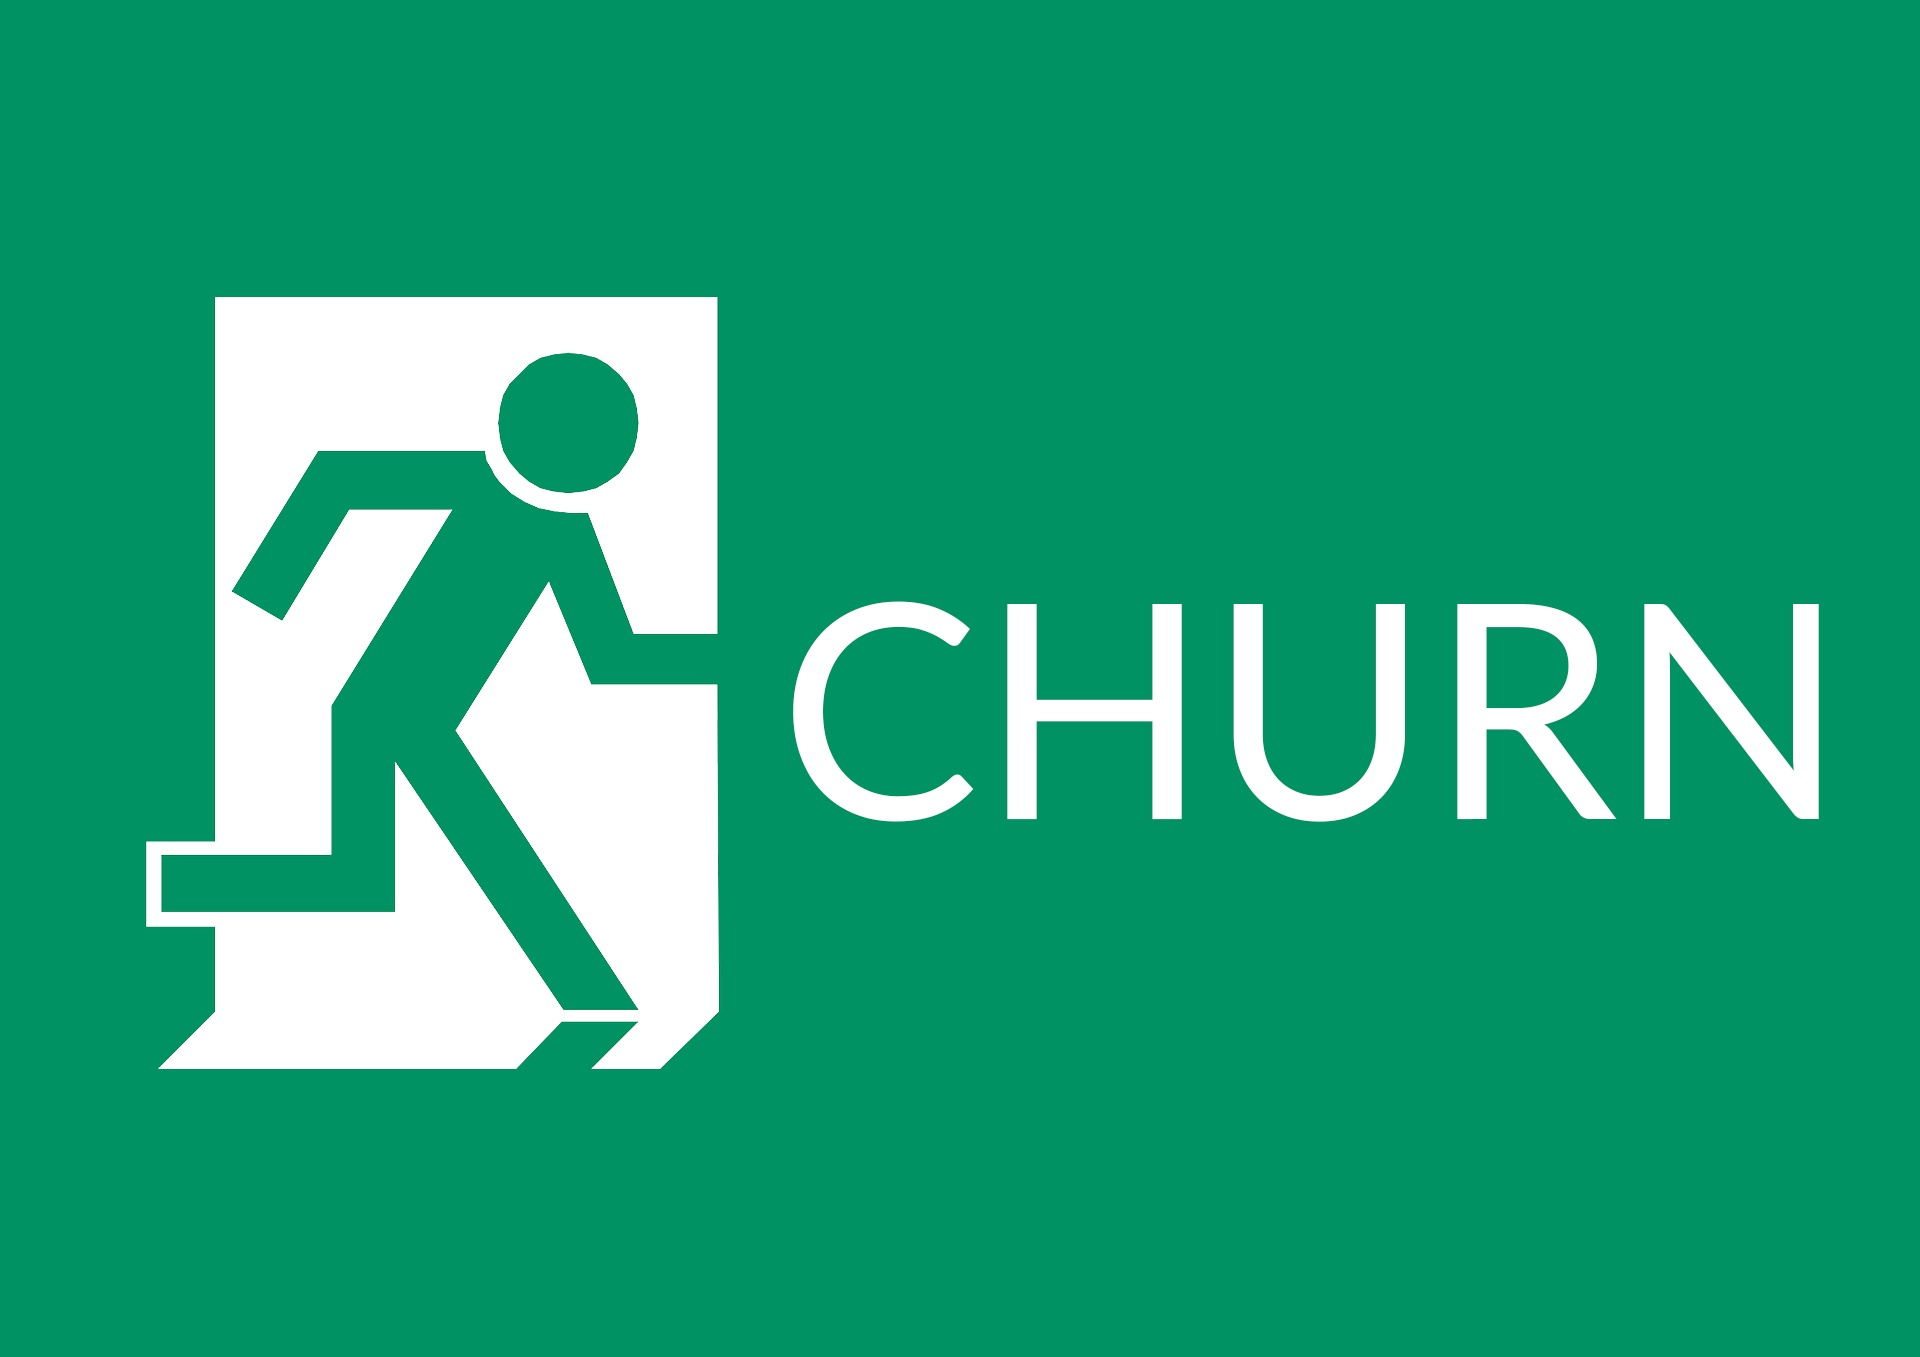

Como podremos saber, una empresa vende un producto o presta un servicio a sus clientes y de esto obtiene dinero, cumpliendo su objetivo principal el cual es generar ganancias.

Por ello, este proyecto aputanara a uno de los componentes mas importantes de una empresa que son los clientes. Mas especificamente, analizaremos el abandono de los mismos, o mas conocido como customer chrun en ingles. 

Utilizaremos un dataset brindando por un banco anonimo, con datos de su cartera de clientes. Como podremos observar el customer churn rate o taza de abandono de clientes es bastante elevado 

In [7]:
bank_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSz3Yx52trZcGRODnR1-aMr8bTTKZDGsZbJj1kw5ms_H5ZOypBXNd2Hyx1bn1A8sznMTQOtCUniEnvJ/pub?output=csv")

In [8]:
bank_df = bank_df.drop(columns=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

## Glosario

**CLIENTNUM** Client number. Unique identifier for the customer holding the account

**Attrition_FlagInternal** event (customer activity) variable - if the account is closed then 1 else 0

**Customer_Age Demographic** variable - Customer's Age in Years

**Gender Demographic** variable - M=Male, F=Female

**Dependent_count** Demographic variable - Number of dependents

**Education_Level** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status** Demographic variable - Married, Single, Divorced, Unknown

**Income_Category** Demographic variable - Annual Income Category of the account holder (<40K,40K-60K,60K-80K,80K-120K,>120K, Unknown)

**Card_Category** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book** Period of relationship with bank

**Total_Relationship_Count** Total no. of products held by the customer

**Months_Inactive_12_mon** No. of months inactive in the last 12 months

**Contacts_Count_12_mon** No. of Contacts in the last 12 months

**Credit_Limit Credit** Limit on the Credit Card

**Total_Revolving_Bal** Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy** Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1** Change in Transaction Amount (Q4 over- Q1)

**Total_Trans_Amt** Total Transaction Amount (Last 12 months)

**Total_Trans_Ct** Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1** Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio** Average Card Utilization Ratio

# Prueba de modelos

Antes de comenzar a probar diferentes modelos, vamos a realizar algunas transfomraciones en los datos. 


## Transformacion de datos

In [9]:
cat_columns = bank_df.drop('Attrition_Flag',axis=1).select_dtypes(include='object').columns
numeric_columns = bank_df.select_dtypes(include=np.number).columns

In [10]:
cat_columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [11]:
numeric_columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
lista = []
for col in cat_columns:
  info = (col, bank_df[col].nunique(), bank_df[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,Gender,2,"[M, F]"
1,Education_Level,7,"[High School, Graduate, Uneducated, Unknown, C..."
2,Marital_Status,4,"[Married, Single, Unknown, Divorced]"
3,Income_Category,6,"[$60K - $80K, Less than $40K, $80K - $120K, $4..."
4,Card_Category,4,"[Blue, Gold, Silver, Platinum]"


En funcion de esto y de la naturaleza de las mismas, decidimos codificarlas de la siguiente forma. El nivel de educacion, nivel de ingresos y categoria de tarjeta de credito, lo codificamos con un label encoder ya que pueden ordenarse. Y las otras dos variables, que son genero y estado civil los clasificamos con un OHE ya que no tiene un ordenamiento. 

In [13]:
bank_df.Attrition_Flag.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Tambien observamos que los clientes que dejan el servicio son un porcentaje muy bajo del total, por lo que va a ser necesario dividir los conjuntos de manera estratificada. 

In [14]:
X = bank_df.drop('Attrition_Flag',axis=1)
y = bank_df['Attrition_Flag']

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state =7 ,stratify = y)

In [16]:
X_train['Education_Level'].unique()

array(['College', 'Graduate', 'Unknown', 'High School', 'Post-Graduate',
       'Doctorate', 'Uneducated'], dtype=object)

In [17]:
X_train['Income_Category'].unique()

array(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       '$120K +', 'Unknown'], dtype=object)

Este sera el ordenamiento que le vamos a dar a las variables cateogricas en el OrdinalEncoder

In [18]:
orden_educacion = ['Unknown','Uneducated','Graduate','Post-Graduate','High School','College','Doctorate']
orden_income_cat = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
orden_card_cat = ['Blue','Silver','Gold','Platinum']

In [19]:
enc_ordenado = OrdinalEncoder(categories=[orden_educacion,orden_income_cat,orden_card_cat])

In [20]:
enc_ordenado.fit(X_train[['Education_Level','Income_Category','Card_Category']])

OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'Graduate',
                            'Post-Graduate', 'High School', 'College',
                            'Doctorate'],
                           ['Unknown', 'Less than $40K', '$40K - $60K',
                            '$60K - $80K', '$80K - $120K', '$120K +'],
                           ['Blue', 'Silver', 'Gold', 'Platinum']])

In [21]:
X_train_t1 = X_train.copy()

In [22]:
X_train_t1[['Education_Level','Income_Category','Card_Category']] = enc_ordenado.transform(X_train[['Education_Level','Income_Category','Card_Category']])

Y estas seran las variables que quedan que no son numericas. Las mismas seran codificadas mediante un OHE

In [23]:
X_train_t1.select_dtypes(include='object').columns

Index(['Gender', 'Marital_Status'], dtype='object')

In [24]:
ohe = OneHotEncoder(drop='first')

In [25]:
ohe.fit(X_train_t1[['Gender','Marital_Status']])

OneHotEncoder(drop='first')

Estas que vemos a continuacion son las columnas de salida

In [26]:
ohe.get_feature_names_out(['Gender','Marital_Status'])

array(['Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown'], dtype=object)

Creamos un DataFrame con las nuevas columnas codificadas

In [27]:
enc_data = pd.DataFrame(ohe.fit_transform(X_train_t1[['Gender','Marital_Status']]).toarray(),
                        columns=ohe.get_feature_names_out(['Gender','Marital_Status']),
                        index=X_train.index)

Luego creamos un nuevo DataFrame de training, uniendo el DataFrame anterior, con el generado por el OHE. Junto con esto, dropeamos las columas que ahora se encuentran codificadas ('Gender','Marital_Status')

In [28]:
X_train_t2 = X_train_t1.join(enc_data).drop(columns=['Gender','Marital_Status'])

Hacemos lo mismo con los datos de test

In [29]:
X_test_t1 = X_test.copy()
X_test_t1[['Education_Level','Income_Category','Card_Category']] = enc_ordenado.transform(X_test[['Education_Level','Income_Category','Card_Category']])

In [30]:
enc_data_2 = pd.DataFrame(ohe.fit_transform(X_test_t1[['Gender','Marital_Status']]).toarray(),
                          columns=ohe.get_feature_names_out(['Gender','Marital_Status'])
                          ,index=X_test.index)
X_test_t2 = X_test_t1.join(enc_data_2).drop(columns=['Gender','Marital_Status'])

Codificamos tambien nuestro conjunto "Y". Dandole valor de "1" a la categoria que nos interesa predecir, en este caso nos interesa detectar los Attrited Customer

In [31]:
y_train = y_train.replace({'Attrited Customer':1,'Existing Customer':0})
y_test = y_test.replace({'Attrited Customer':1,'Existing Customer':0})

In [32]:
y_train.value_counts()

0    6799
1    1302
Name: Attrition_Flag, dtype: int64

In [33]:
y_test.value_counts()

0    1701
1     325
Name: Attrition_Flag, dtype: int64

## MODELOS BASE

### LogisticRegression

In [34]:
log_reg = LogisticRegression(max_iter=800,
                             n_jobs=-1)
log_reg.fit(X_train_t2,y_train)
y_pred_LR = log_reg.predict(X_test_t2)

In [35]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1701
           1       0.74      0.45      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



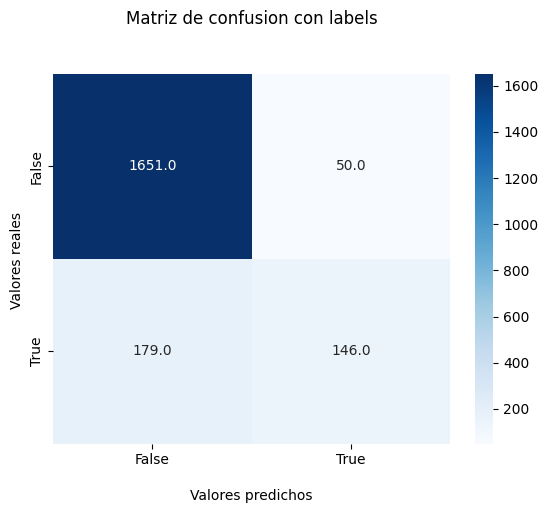

In [36]:
mat_conf(y_test,y_pred_LR)

### KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn.fit(X_train_t2, y_train)
predicciones_knn = knn.predict(X_test_t2)

In [38]:
print(classification_report(y_test, predicciones_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.55      0.63       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.78      2026
weighted avg       0.89      0.90      0.89      2026



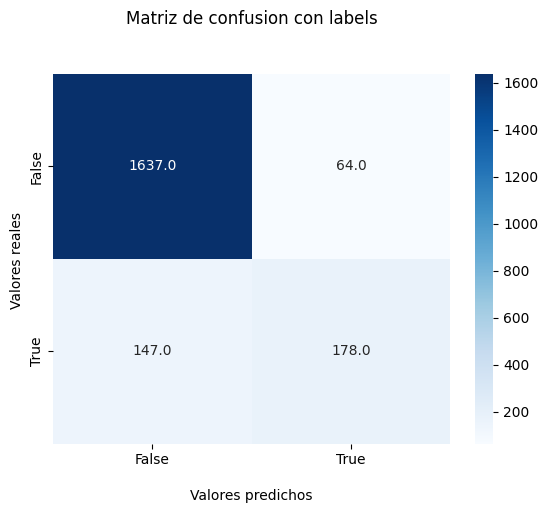

In [39]:
mat_conf(y_test,predicciones_knn)

### RandomForestClassifier

In [40]:
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf.fit(X_train_t2, y_train)
y_pred_RFC = clf.predict(X_test_t2)

In [41]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1701
           1       0.91      0.54      0.68       325

    accuracy                           0.92      2026
   macro avg       0.91      0.76      0.81      2026
weighted avg       0.92      0.92      0.91      2026



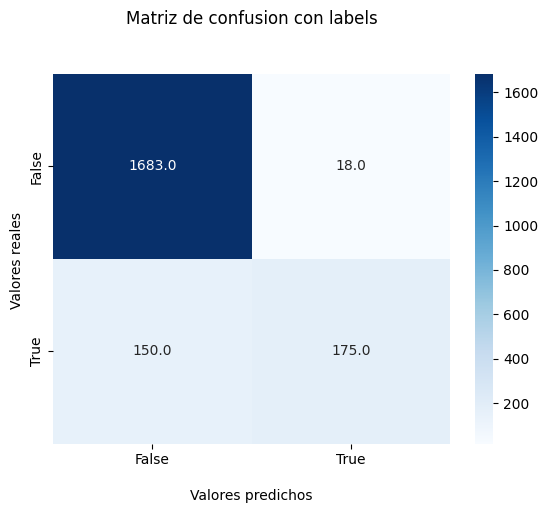

In [42]:
mat_conf(y_test,y_pred_RFC)


## Estandarizacion de datos


Para algunos modelos como Logistic Regression, puede ser util tener los datos estandarizados. Para ello, vamos a intentar hacer algunos test de hipotesis para definir si las variables tengan una distribucion normal, vamos a estandarizarlos mediante un StandarScaler y en caso de que no tengan una distribucion normal, los vamos a estandarizar mediante un RobusScaler

In [43]:
col_a_estandarizar = set(X_train.columns)-set(['Gender','Marital_Status'])  # Quito las columnas que tendran el label encoder
# col_a_estandarizar = X_train_t2.columns

In [44]:
#seleccion de columnas normalizadas
normal_cols = []

#loop en todas las columnas del x_train
for col in col_a_estandarizar:

  #calculo de D'Agostino's K-squared test
  k2, p_value = stats.normaltest(X_train_t2[col])
  #chequeo de si p-value es mayor a 0.05 es distribucion normal
  if p_value > 0.05:
    normal_cols.append(col)
  
  #print de todas las variables con su valor
  print(f"columna {col} ---- Estadístico = {k2}, p-value = {p_value}")

#seleccion de las variables que no estan en normal,  nos daran el resto de columnas no seleccionadas
#conjunto  de todas las columnas menos conjunto de las columnas normalizadas = resto de columnas a estudiar
not_stander = list(set(X_train_t2.columns) - set(normal_cols))

columna Months_Inactive_12_mon ---- Estadístico = 611.8931548781936, p-value = 1.3461382384564692e-133
columna Total_Revolving_Bal ---- Estadístico = 4823.2046341608175, p-value = 0.0
columna Contacts_Count_12_mon ---- Estadístico = 0.8040002954715753, p-value = 0.6689806468579567
columna Income_Category ---- Estadístico = 1342.0380995995915, p-value = 3.803027098447087e-292
columna Education_Level ---- Estadístico = 1321.9638599785662, p-value = 8.693510197623728e-288
columna Total_Ct_Chng_Q4_Q1 ---- Estadístico = 4088.851314672391, p-value = 0.0
columna Dependent_count ---- Estadístico = 423.58309634607036, p-value = 1.0473680333724518e-92
columna Total_Relationship_Count ---- Estadístico = 2026.998644004482, p-value = 0.0
columna Customer_Age ---- Estadístico = 38.41160546539957, p-value = 4.560640637082243e-09
columna Total_Amt_Chng_Q4_Q1 ---- Estadístico = 3587.25473866226, p-value = 0.0
columna Total_Trans_Amt ---- Estadístico = 3198.434742503083, p-value = 0.0
columna Avg_Utiliz

In [45]:
normal_cols

['Contacts_Count_12_mon']

In [46]:
not_stander

['Months_Inactive_12_mon',
 'Marital_Status_Married',
 'Total_Revolving_Bal',
 'Gender_M',
 'Income_Category',
 'Education_Level',
 'Total_Ct_Chng_Q4_Q1',
 'Dependent_count',
 'Total_Relationship_Count',
 'Customer_Age',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Avg_Utilization_Ratio',
 'Avg_Open_To_Buy',
 'Marital_Status_Unknown',
 'Marital_Status_Single',
 'Months_on_book',
 'Card_Category',
 'Total_Trans_Ct',
 'Credit_Limit']

In [47]:
X_train_t3 = X_train_t2.copy()
X_test_t3 = X_test_t2.copy()

In [48]:
#proceso de transformacion en X_train

#standarizacion es el z-score utilizado para variables ya con distribucion normal
sc = StandardScaler()
X_train_t3[normal_cols] = sc.fit_transform(X_train_t3[normal_cols])

#utilizacion para cambiar el valor con una distribucion mas desconocida
rs = RobustScaler()
X_train_t3[not_stander] = rs.fit_transform(X_train_t3[not_stander])



In [49]:
X_train_t3

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
6207,-0.818182,0.5,1.000000,-0.5,0.0,-1.125,0.0,0.0,-2.208556,-0.368504,...,-0.322648,0.181818,0.284559,0.166667,1.886076,0.631250,0.0,1.0,0.0,0.0
9099,-0.272727,0.5,0.000000,0.0,0.0,-0.125,0.5,1.0,-0.410414,0.179254,...,0.210854,1.034632,0.378899,-0.305556,-0.223629,-0.095833,1.0,0.0,1.0,0.0
1957,-1.272727,-0.5,-0.666667,-0.5,0.0,0.000,0.5,1.0,0.488657,0.181614,...,0.127100,0.506494,-0.852522,-0.972222,0.767932,0.154167,1.0,1.0,0.0,0.0
3383,0.000000,1.0,-0.666667,0.5,0.0,-0.875,1.0,1.0,-0.410414,0.138541,...,-0.020322,-0.519481,0.010012,0.222222,-0.295359,0.510417,1.0,1.0,0.0,0.0
2206,-1.000000,0.0,0.666667,-0.5,0.0,-1.750,0.0,1.0,0.488657,-0.238022,...,-0.329144,0.294372,-0.613400,-0.500000,-1.092827,1.147917,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6829,0.363636,-1.0,0.666667,-0.5,0.0,0.875,1.0,2.0,-0.410414,-0.223153,...,-0.325620,-0.467532,0.234501,-0.055556,-0.139241,1.152083,0.0,0.0,1.0,0.0
268,1.636364,-1.0,0.666667,0.0,0.0,2.125,-1.5,1.0,0.488657,-0.142554,...,-0.017033,1.233766,-1.125144,-1.361111,-1.329114,-0.364583,0.0,1.0,0.0,0.0
5191,0.636364,0.5,0.666667,-1.0,0.0,0.000,0.0,1.0,3.185870,0.398631,...,0.521673,-0.800866,-0.621101,-0.694444,-1.637131,-0.364583,0.0,0.0,0.0,0.0
3380,-0.636364,-0.5,0.000000,-0.5,0.0,0.000,-0.5,1.0,-1.309485,-0.244395,...,-0.268883,-0.800866,-0.762418,-0.916667,-0.341772,0.706250,0.0,1.0,0.0,0.0


In [50]:
X_train_t3.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,8101.0,3.679680e-02,0.732343,-1.818182,-0.454545,0.000000,0.545455,2.454545
Dependent_count,8101.0,1.715220e-01,0.651439,-1.000000,-0.500000,0.000000,0.500000,1.500000
Education_Level,8101.0,1.552483e-01,0.573342,-0.666667,-0.333333,0.000000,0.666667,1.333333
Income_Category,8101.0,3.715591e-02,0.733991,-1.000000,-0.500000,0.000000,0.500000,1.500000
Card_Category,8101.0,8.579188e-02,0.340184,0.000000,0.000000,0.000000,0.000000,3.000000
Months_on_book,8101.0,5.709172e-04,1.001273,-2.875000,-0.500000,0.000000,0.500000,2.500000
Total_Relationship_Count,8101.0,-9.443279e-02,0.778790,-1.500000,-0.500000,0.000000,0.500000,1.000000
Months_Inactive_12_mon,8101.0,3.425503e-01,1.015462,-2.000000,0.000000,0.000000,1.000000,4.000000
Contacts_Count_12_mon,8101.0,3.332999e-17,1.000062,-2.208556,-0.410414,-0.410414,0.488657,3.185870
Credit_Limit,8101.0,4.842887e-01,1.077279,-0.368504,-0.235190,0.000000,0.764810,3.534930


### LogisticRegression c/datos estandarizados

In [51]:
log_reg_std = LogisticRegression(max_iter=800,n_jobs=-1)
log_reg_std.fit(X_train_t3,y_train)
y_pred_LRstd = log_reg_std.predict(X_test_t3)

In [52]:
print('Resultados LogisticRegression c/variables estandarizadas')
print(classification_report(y_test, y_pred_LRstd))
print('Resultados LogisticRegression c/variables sin estandarizar')
print(classification_report(y_test, y_pred_LR))

Resultados LogisticRegression c/variables estandarizadas
              precision    recall  f1-score   support

           0       0.83      0.24      0.37      1701
           1       0.16      0.74      0.26       325

    accuracy                           0.32      2026
   macro avg       0.49      0.49      0.31      2026
weighted avg       0.72      0.32      0.35      2026

Resultados LogisticRegression c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1701
           1       0.74      0.45      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



como vemos la estandarizacion de las variables no genero un resultado mejor al que obtuvimos con las variables sin estandarizar.

Queda pendiente analizar si el problema fue el modo en que se estandarizaron o si para este caso no es conveniente hacerlo. 


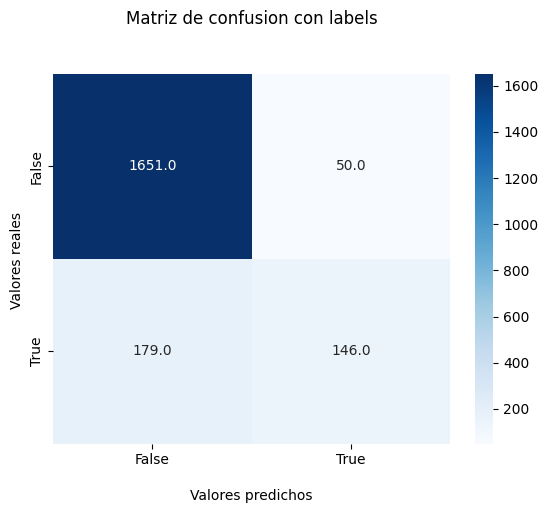

In [53]:
mat_conf(y_test,y_pred_LR)

### KNeighborsClassifier c/datos estandarizados

In [54]:
knn_std = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn_std.fit(X_train_t3, y_train)
predicciones_knn_std = knn_std.predict(X_test_t3)

In [55]:
print('Resultados KNeighborsClassifier c/variables estandarizadas')
print(classification_report(y_test, predicciones_knn_std,zero_division=0))
print('Resultados KNeighborsClassifier c/variables sin estandarizar')
print(classification_report(y_test, predicciones_knn,zero_division=0))

Resultados KNeighborsClassifier c/variables estandarizadas
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       0.00      0.00      0.00       325

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.77      2026

Resultados KNeighborsClassifier c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.55      0.63       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.78      2026
weighted avg       0.89      0.90      0.89      2026



No entiendo porque no predijo ningun valor = 1 el algoritmo


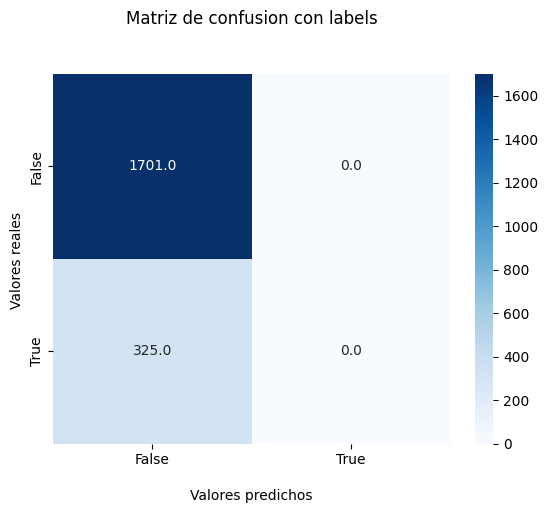

In [56]:
mat_conf(y_test,predicciones_knn_std)

### RandomForestClassifier c/datos estandarizados

In [57]:
clf_std = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf_std.fit(X_train_t3, y_train)
y_pred_RFCstd = clf_std.predict(X_test_t3)

In [58]:
print('Resultados KNeighborsClassifier c/variables estandarizadas')
print(classification_report(y_test, y_pred_RFCstd,zero_division=0))
print('Resultados KNeighborsClassifier c/variables sin estandarizar')
print(classification_report(y_test, y_pred_RFC,zero_division=0))

Resultados KNeighborsClassifier c/variables estandarizadas
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       0.00      0.00      0.00       325

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.77      2026

Resultados KNeighborsClassifier c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1701
           1       0.91      0.54      0.68       325

    accuracy                           0.92      2026
   macro avg       0.91      0.76      0.81      2026
weighted avg       0.92      0.92      0.91      2026



Lo mismo que el modelo anterior. No predice valores positivos. 

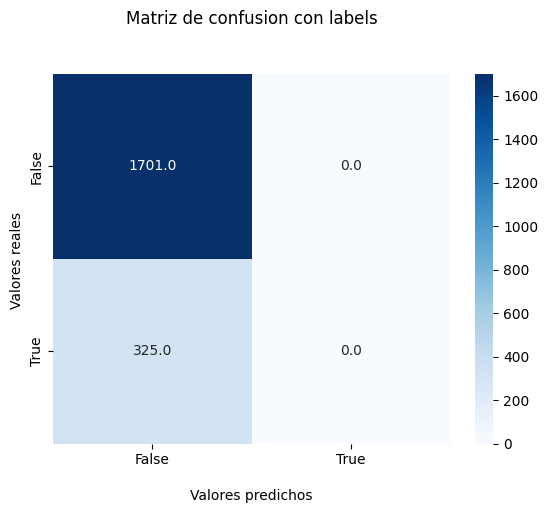

In [59]:
mat_conf(y_test,y_pred_RFCstd)

## PCA

In [60]:
#Importamos la libreria
from sklearn.decomposition import PCA

#Generamos el objeto
model_pca = PCA(n_components = 10)

#Aplicamos pca
X_pca_test=model_pca.fit_transform(X_test_t2)
x_pca_train=model_pca.fit_transform(X_train_t2)

In [61]:
#Variaanza explicada de las componentes
var_explicada_pca = model_pca.explained_variance_ratio_
var_explicada_pca

array([9.31713673e-01, 6.27122701e-02, 5.57220940e-03, 1.06608609e-06,
       6.41087546e-07, 7.58749226e-08, 1.65346927e-08, 1.19214011e-08,
       9.99643332e-09, 9.00976861e-09])

### LogisticRegression

In [62]:
log_reg_pca = LogisticRegression(max_iter=800,n_jobs=-1)
log_reg_pca.fit(x_pca_train,y_train)
y_pred_LRpca = log_reg_pca.predict(X_pca_test)

In [63]:
print('Resultados LogisticRegression c/PCA')
print(classification_report(y_test, y_pred_LRpca))
print('Resultados LogisticRegression c/variables sin estandarizar')
print(classification_report(y_test, y_pred_LR))

Resultados LogisticRegression c/PCA
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1701
           1       0.04      0.02      0.03       325

    accuracy                           0.77      2026
   macro avg       0.44      0.47      0.45      2026
weighted avg       0.70      0.77      0.74      2026

Resultados LogisticRegression c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1701
           1       0.74      0.45      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



Como al cambiar la cantidad de variables que queremos en el PCA nos da diferentes resultados, vamos a hacer un bucle que pruebe con muchos valores y nos arroje los resultados de c/u

In [64]:
resultados = pd.DataFrame(columns={'cant-variables','accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'})

In [65]:
for i in range(1,15):
  pca = PCA(n_components = i)
  xTest = pca.fit_transform(X_test_t2)
  xTrain = pca.fit_transform(X_train_t2)
  log_reg_pca.fit(xTrain,y_train)
  y_pred_LRpca = log_reg_pca.predict(xTest)
  fila =  pd.DataFrame({'cant-variables':[i],
                        'accuracy_score':[accuracy_score(y_test,y_pred_LRpca)],
                        'precision_score':[precision_score(y_test, y_pred_LRpca)],
                        'recall_score':[recall_score(y_test, y_pred_LRpca)],
                        'f1_score':[ f1_score(y_test, y_pred_LRpca)],
                        'roc_auc_score':[ roc_auc_score(y_test,y_pred_LRpca)]})
  resultados = pd.concat([resultados,fila])

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
resultados = resultados.set_index('cant-variables')

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [67]:
resultados.sort_values(by='accuracy_score',ascending=False).head()

,recall_score,accuracy_score,f1_score,precision_score,roc_auc_score
cant-variables,,,,,
3,0.006154,0.840573,0.012232,1.000,0.503077
1,0.000000,0.839585,0.000000,0.000,0.500000
2,0.000000,0.839585,0.000000,0.000,0.500000
7,0.003077,0.778875,0.004444,0.008,0.465089
4,0.000000,0.778381,0.000000,0.000,0.463551


In [68]:
resultados.sort_values(by='precision_score',ascending=False).head()

,recall_score,accuracy_score,f1_score,precision_score,roc_auc_score
cant-variables,,,,,
3,0.006154,0.840573,0.012232,1.000000,0.503077
13,0.064615,0.769497,0.082515,0.114130,0.484395
14,0.064615,0.769497,0.082515,0.114130,0.484395
12,0.058462,0.769990,0.075397,0.106145,0.482200
11,0.055385,0.771964,0.072289,0.104046,0.482131


In [69]:
resultados.sort_values(by='f1_score',ascending=False).head()

,recall_score,accuracy_score,f1_score,precision_score,roc_auc_score
cant-variables,,,,,
13,0.064615,0.769497,0.082515,0.114130,0.484395
14,0.064615,0.769497,0.082515,0.114130,0.484395
12,0.058462,0.769990,0.075397,0.106145,0.482200
11,0.055385,0.771964,0.072289,0.104046,0.482131
9,0.021538,0.772952,0.029536,0.046980,0.469029


In [70]:
resultados.sort_values(by='roc_auc_score',ascending=False).head()

,recall_score,accuracy_score,f1_score,precision_score,roc_auc_score
cant-variables,,,,,
3,0.006154,0.840573,0.012232,1.00000,0.503077
1,0.000000,0.839585,0.000000,0.00000,0.500000
2,0.000000,0.839585,0.000000,0.00000,0.500000
13,0.064615,0.769497,0.082515,0.11413,0.484395
14,0.064615,0.769497,0.082515,0.11413,0.484395


In [71]:
resultados.sort_values(by='recall_score',ascending=False).head()

,recall_score,accuracy_score,f1_score,precision_score,roc_auc_score
cant-variables,,,,,
13,0.064615,0.769497,0.082515,0.114130,0.484395
14,0.064615,0.769497,0.082515,0.114130,0.484395
12,0.058462,0.769990,0.075397,0.106145,0.482200
11,0.055385,0.771964,0.072289,0.104046,0.482131
9,0.021538,0.772952,0.029536,0.046980,0.469029


En funcion de esto, vamos a definir que el resultado para un mejor PCA lo ofrece un n_components = 3

In [72]:
log_reg_pca = LogisticRegression(max_iter=800,n_jobs=-1)
pca = PCA(n_components = 3)
xTest = pca.fit_transform(X_test_t2)
xTrain = pca.fit_transform(X_train_t2)
log_reg_pca.fit(xTrain,y_train)
y_pred_LRpca = log_reg_pca.predict(xTest)

In [73]:
print('Resultados LogisticRegression c/PCA + mod')
print(classification_report(y_test, y_pred_LRpca))
print('Resultados LogisticRegression sin modificar')
print(classification_report(y_test, y_pred_LR))

Resultados LogisticRegression c/PCA + mod
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       1.00      0.01      0.01       325

    accuracy                           0.84      2026
   macro avg       0.92      0.50      0.46      2026
weighted avg       0.87      0.84      0.77      2026

Resultados LogisticRegression sin modificar
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1701
           1       0.74      0.45      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



El resultado no mejoro

### KNeighborsClassifier

Aca se hizo un bucle parecido al anterior, pero le agregamos la variacion en el hiperparametro n_neighbors

In [74]:
resultados_KNC = pd.DataFrame(columns={'cant-variables','VecinosCercanos','accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'})

In [75]:
for i in range(1,15):
  pca = PCA(n_components = i)
  xTest = pca.fit_transform(X_test_t2)
  xTrain = pca.fit_transform(X_train_t2)
  for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain,y_train)
    y_pred_knn = knn.predict(xTest)
    fila =  pd.DataFrame({'cant-variables':[i],
                          'VecinosCercanos':[k],
                          'accuracy_score':[accuracy_score(y_test,y_pred_LRpca)],
                          'precision_score':[precision_score(y_test, y_pred_LRpca)],
                          'recall_score':[recall_score(y_test, y_pred_LRpca)],
                          'f1_score':[ f1_score(y_test, y_pred_LRpca)],
                          'roc_auc_score':[ roc_auc_score(y_test,y_pred_LRpca)]})
    resultados_KNC = pd.concat([resultados_KNC,fila],ignore_index=True)

In [76]:
resultados_KNC.sort_values(by='accuracy_score',ascending=False).head()

,recall_score,accuracy_score,precision_score,roc_auc_score,cant-variables,VecinosCercanos,f1_score
0,0.006154,0.840573,1.0,0.503077,1,1,0.012232
79,0.006154,0.840573,1.0,0.503077,9,8,0.012232
92,0.006154,0.840573,1.0,0.503077,11,3,0.012232
91,0.006154,0.840573,1.0,0.503077,11,2,0.012232
90,0.006154,0.840573,1.0,0.503077,11,1,0.012232


In [77]:
resultados_KNC.sort_values(by='precision_score',ascending=False).head()

,recall_score,accuracy_score,precision_score,roc_auc_score,cant-variables,VecinosCercanos,f1_score
0,0.006154,0.840573,1.0,0.503077,1,1,0.012232
79,0.006154,0.840573,1.0,0.503077,9,8,0.012232
92,0.006154,0.840573,1.0,0.503077,11,3,0.012232
91,0.006154,0.840573,1.0,0.503077,11,2,0.012232
90,0.006154,0.840573,1.0,0.503077,11,1,0.012232


In [78]:
resultados_KNC.sort_values(by='recall_score',ascending=False).head()

,recall_score,accuracy_score,precision_score,roc_auc_score,cant-variables,VecinosCercanos,f1_score
0,0.006154,0.840573,1.0,0.503077,1,1,0.012232
79,0.006154,0.840573,1.0,0.503077,9,8,0.012232
92,0.006154,0.840573,1.0,0.503077,11,3,0.012232
91,0.006154,0.840573,1.0,0.503077,11,2,0.012232
90,0.006154,0.840573,1.0,0.503077,11,1,0.012232


In [79]:
resultados_KNC.sort_values(by='f1_score',ascending=False).head()

,recall_score,accuracy_score,precision_score,roc_auc_score,cant-variables,VecinosCercanos,f1_score
0,0.006154,0.840573,1.0,0.503077,1,1,0.012232
79,0.006154,0.840573,1.0,0.503077,9,8,0.012232
92,0.006154,0.840573,1.0,0.503077,11,3,0.012232
91,0.006154,0.840573,1.0,0.503077,11,2,0.012232
90,0.006154,0.840573,1.0,0.503077,11,1,0.012232


In [80]:
resultados_KNC.sort_values(by='roc_auc_score',ascending=False).head()

,recall_score,accuracy_score,precision_score,roc_auc_score,cant-variables,VecinosCercanos,f1_score
0,0.006154,0.840573,1.0,0.503077,1,1,0.012232
79,0.006154,0.840573,1.0,0.503077,9,8,0.012232
92,0.006154,0.840573,1.0,0.503077,11,3,0.012232
91,0.006154,0.840573,1.0,0.503077,11,2,0.012232
90,0.006154,0.840573,1.0,0.503077,11,1,0.012232


En funcion de esto podemos determinar que la mejor opcion seria entrenar con n_components = 1 en PCA y n_neighbors = 5 para el KNeighborsClassifier 

In [81]:
knn_mod = KNeighborsClassifier(n_neighbors=5)
pca = PCA(n_components = 1)
xTest = pca.fit_transform(X_test_t2)
xTrain = pca.fit_transform(X_train_t2)
knn_mod.fit(xTrain, y_train)
predicciones_knn_mod = knn_mod.predict(xTest)

In [82]:
print('Resultados KNeighborsClassifier c/PCA + mod')
print(classification_report(y_test, predicciones_knn_mod,zero_division=0))
print('Resultados KNeighborsClassifier sin modificaciones')
print(classification_report(y_test, predicciones_knn,zero_division=0))

Resultados KNeighborsClassifier c/PCA + mod
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1701
           1       0.21      0.05      0.08       325

    accuracy                           0.82      2026
   macro avg       0.52      0.51      0.49      2026
weighted avg       0.74      0.82      0.77      2026

Resultados KNeighborsClassifier sin modificaciones
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.55      0.63       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.78      2026
weighted avg       0.89      0.90      0.89      2026



El resultado no mejoro

## Analisis de outliers

In [83]:
from sklearn.ensemble import IsolationForest

In [84]:
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1, random_state=42) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train_t2)

# seleccionar todas las filas que no son outliers
mask = yhat != -1 # filtro


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Ver si podemos terminarlo, pero no anduvo. Arrojo un error